<a href="https://colab.research.google.com/github/YaseminSarpkaya/CS412-MachineLearning/blob/main/CS412_German_Credit_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adding the Dataset

In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# importing the necessary libraries

import pandas as pd
import numpy as np
from numpy import asarray
from sklearn import svm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2, SelectKBest, f_classif, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('/content/drive/My Drive/CS412/Project/german_credit_data.csv')
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#  Data Preprocessing

In [ ]:
print(data.info()) #checking for empty data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None


Here, we can see that there are missing values at saving accounts and checking account columns. Therefore, we will perform kNN imputing for these columns.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Convert categorical variables to numerical values
# Ordinal Encoding for ordinal variables (Job, Saving accounts)
ordinal_features = ['Job', 'Saving accounts']
ordinal_encoder = OrdinalEncoder()
data[ordinal_features] = ordinal_encoder.fit_transform(data[ordinal_features])

# Label Encoding for non-ordinal variables (Sex, Housing, Checking account, Purpose)
non_ordinal_features = ['Sex', 'Housing', 'Checking account', 'Purpose']
label_encoder = LabelEncoder()
data[non_ordinal_features] = data[non_ordinal_features].apply(label_encoder.fit_transform)

risk_replace = {'bad':0,'good':1}
# Separate input features (X) and target variable (y)
X = data.drop(
    labels = ['Risk', 'Unnamed: 0'],
    axis=1)
y = data['Risk'].replace(risk_replace)


imputer = KNNImputer(n_neighbors=15)
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

In [ ]:
print(X.head())
print(X.info())

    Age  Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
0  67.0  1.0  2.0      1.0              0.6               0.0         1169.0   
1  22.0  0.0  2.0      1.0              0.0               1.0         5951.0   
2  49.0  1.0  1.0      1.0              0.0               3.0         2096.0   
3  45.0  1.0  2.0      0.0              0.0               0.0         7882.0   
4  53.0  1.0  2.0      0.0              0.0               0.0         4870.0   

   Duration  Purpose  
0       6.0      5.0  
1      48.0      5.0  
2      12.0      3.0  
3      42.0      4.0  
4      24.0      1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   float64
 1   Sex               1000 non-null   float64
 2   Job               1000 non-null   float64
 3   Housing           1000 non-null   fl

In [ ]:

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Create an instance of the DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the model on the training set
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.31


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a GridSearchCV instance for hyperparameter tuning
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Train the model on the training set
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_regressor = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the validation set
y_pred = best_regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error (Train):", mse)

# Evaluate the best model on the test set
y_pred_test = best_regressor.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (Test):", mse_test)

Mean Squared Error (Train): 0.1428062925056928
Mean Squared Error (Test): 0.1837777498368275


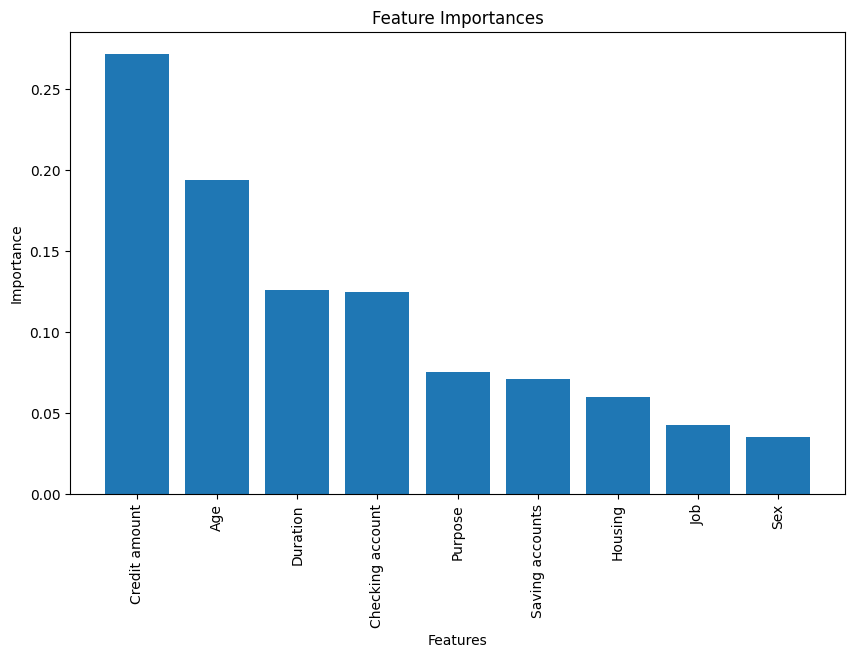

In [ ]:
# Create an instance of the DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the model on the training set
regressor.fit(X_train, y_train)

# Get feature importances
importances = regressor.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on feature importances
feature_names = X.columns[indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

Feature Selection

In [ ]:
# Create an instance of SelectKBest with the desired number of top features to select
k = 5  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)

# Fit the selector on the training data and transform both training and test data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]
print(selected_feature_names)

Index(['Age', 'Saving accounts', 'Checking account', 'Credit amount',
       'Duration'],
      dtype='object')


In [ ]:
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# Train the model on the training set
regressor.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test_selected)

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.745


Scaling

In [ ]:
# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()
scaler2 = StandardScaler()

X_scaled = scaler2.fit_transform(X_train_selected)
X_test_scaled = scaler2.fit_transform(X_test_selected)
y_pred = regressor.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.745


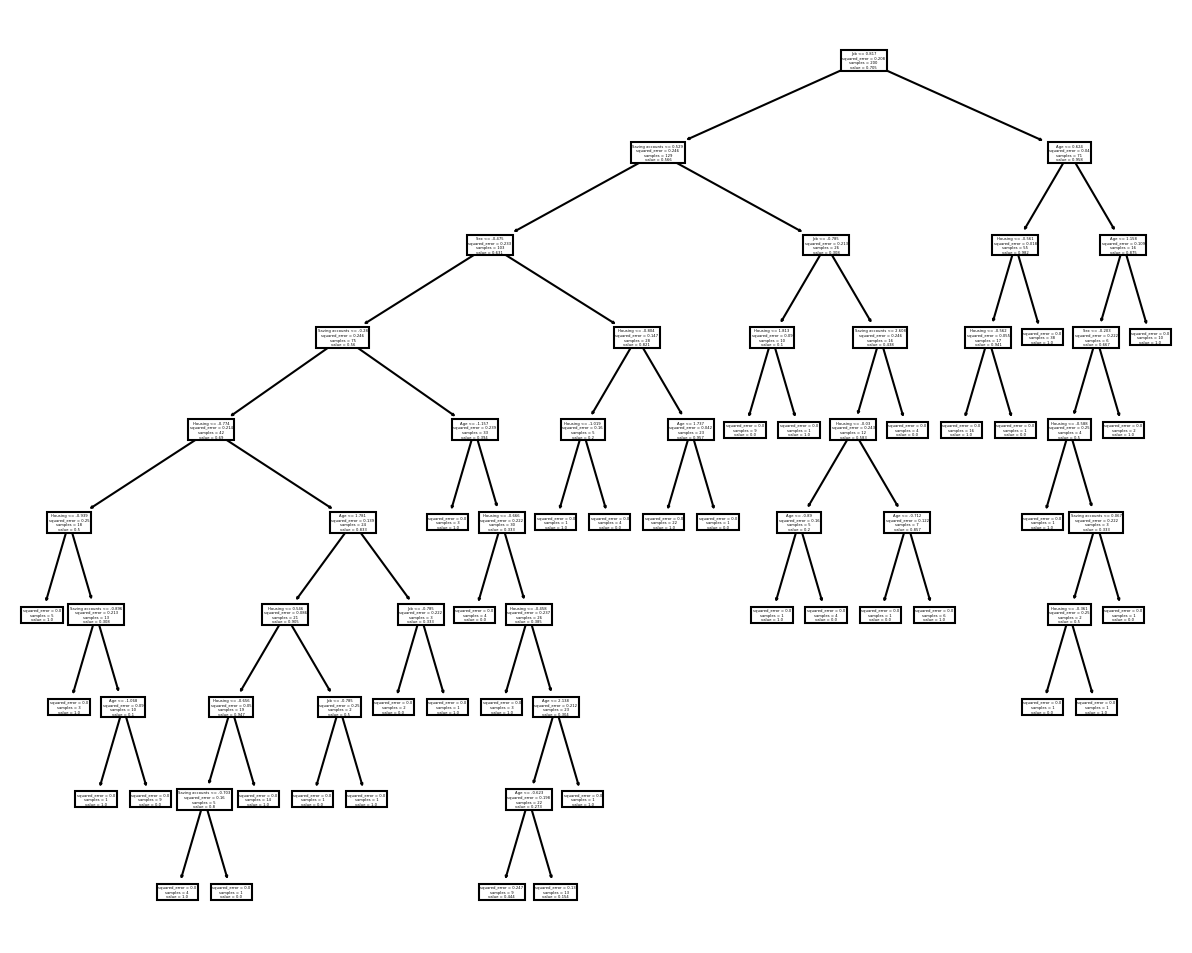

In [ ]:

from sklearn.tree import plot_tree
model = DecisionTreeRegressor(max_depth=9)
model.fit(X_test_scaled, y_test)
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns);

# Logistic Regression

With different k values used in kNN Imputing:

k = 25, accuracy = 73.20

k = 15, accuracy = 74.80

k = 10, accuracy = 74.80

k = 5, accuracy = 74.40


Now let's try increasing the accuracy by trying different hyper-parameters!

In [ ]:
accuracy = 0
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#First trying with l2- ridge
param_grid = {'penalty': ['l2'], 'C': [0.01, 0.1, 1.0, 10.0, 100.0]}

model = LogisticRegression()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters:  {'C': 10.0, 'penalty': 'l2'}
Best Score:  0.72
Accuracy: 0.76


In [ ]:
accuracy = 0
#now trying l1 - lasso
param_grid = {'C': [0.01, 0.1, 1.0, 10.0]}

model = LogisticRegression(penalty='l1', solver='liblinear')


grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

best_model_l1 = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters:  {'C': 0.1}
Best Score:  0.72
Accuracy: 0.76


In [ ]:
model = LogisticRegression(max_iter = 1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.77


In [ ]:
ft = SelectKBest(chi2, k = 4).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [5.65003557e+01 2.08564629e+00 5.91911462e-01 5.12580017e-02
 1.64173320e+01 8.78387786e+01 5.32176261e+04 2.15084352e+02
 7.68449295e+00]
Columns:  Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')


In [ ]:
X_train_2 = ft.transform(X_train)
X_test_2 = ft.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter = 1000)

model.fit(X_train_2, y_train)

y_pred = model.predict(X_test_2)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.775


# Support Vector Machines

In [ ]:
svm_model = svm.SVC(kernel="linear")

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

# Evaluate the performance of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

**Accuracies for different kernels:**

* Poly: 0.724

* Sigmoid: 0.676

* RBF: 0.728

* Linear: 0.74

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the SVM classifier with the best hyperparameters
best_model = svm.SVC(kernel= "linear", C=best_params['C'], gamma=best_params['gamma'])
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the performance of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'C': 10, 'gamma': 0.1}
Accuracy: 0.735


In [ ]:
#finding best features
ft = SelectKBest(chi2, k = 4).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [5.65003557e+01 2.08564629e+00 5.91911462e-01 5.12580017e-02
 1.64173320e+01 8.78387786e+01 5.32176261e+04 2.15084352e+02
 7.68449295e+00]
Columns:  Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')


In [ ]:
X_train_2 = ft.transform(X_train)
X_test_2 = ft.transform(X_test)

In [ ]:
from sklearn import preprocessing
X_train = preprocessing.StandardScaler().fit(X_train_2).transform(X_train_2.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test_2).transform(X_test_2.astype(float))

In [ ]:
svm_model = svm.SVC(kernel="poly")

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

# Evaluate the performance of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.76
